# Segunda Parte

### Imports

In [4]:
# data analysis and data wrangling
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Actual PATH
import os
import subprocess

### Prepare Principal Directory

In [3]:
def exit_current_directory():
    # Actual PATH
    path = os.getcwd()
    print('Current working directory:\n{}\n'.format(path))

    os.chdir('..')
    print('Change directory to:\n{}\n'.format(os.getcwd()))
    
exit_current_directory()

Current working directory:
/home/campos/projetos/artificial_inteligence/projects/analise_despesas_senadores/notebooks

Change directory to:
/home/campos/projetos/artificial_inteligence/projects/analise_despesas_senadores



### Cell Format

In [5]:
# guarantees visualization inside the jupyter
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (22, 12)

# Print all rows and columns. Dont hide any
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Definition color and map de colors
default_color = '#56B4E9'
colormap = plt.cm.cool

### Load dataset

In [8]:
df = pd.read_csv('data/dados_limpos_ceaps_processed.csv',
                 encoding='utf-8',
                 delimiter=',',
                 verbose=True,
                 parse_dates=['DATA'])

Tokenization took: 27.81 ms
Type conversion took: 39.73 ms
Parser memory cleanup took: 0.00 ms


In [9]:
#Primeiras linhas do dataset
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,2016,1,1,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,2016-01-13,Despesa com pagamento de energia elétrica para...,73.60
1,2016,1,1,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,2016-01-18,Pagamento de energia elétrica para o escritóri...,206.84
2,2016,1,1,Aluguel,004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,2016-04-01,"Despesa com pagamento de aluguel, utilizado pa...",6000.00
3,2016,1,1,Aluguel,05.423.963/0001-11,OI MÓVEL S.A.,661639001,2016-01-16,despesa com pagamento de telefonia para o escr...,407.48
4,2016,1,1,Despesas gerais,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,2016-06-01,Aquisição de publicação virtual de conteúdo jo...,550.00


### Seleção condicional onde pegamos todos as linhas cujo o valor reembolsado é R$ 0,01

In [10]:
df[df['VALOR_REEMBOLSADO'] == 0.01]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
6773,2016,3,29,Passagens,07.575.651/0001-59,GOL,NFPJ4Z,2016-03-22,"Companhia Aérea: GOL, Localizador: NFPJ4Z. Pas...",0.01
6774,2016,3,29,Passagens,07.575.651/0001-59,GOL,OEI85P,2016-03-30,"Companhia Aérea: GOL, Localizador: OEI85P. Pas...",0.01
11160,2016,6,42,Passagens,33.937.681/0001-78,LATAM,3EY28M,2016-02-06,"Companhia Aérea: LATAM, Localizador: 3EY28M. P...",0.01
11376,2016,12,42,Passagens,07.575.651/0001-59,GOL TRANSPORTES AÉREOS S/A,NCNMYL,2016-10-17,"Companhia Aérea: GOL, Localizador: NCNMYL. Pas...",0.01
18560,2016,6,64,Passagens,12.281.922/0001-01,Via Berrini Turismo e Eventos Ltda ME,FT00020270,2016-07-21,"Companhia Aérea: AZUL, Localizador: PYZD4M. Pa...",0.01
23071,2016,3,83,Passagens,11.489.244/0001-04,CONTINENTAL TURISMO,BGNV5G,2016-03-31,"Companhia Aérea: GOL, Localizador: BGNV5G. Pas...",0.01


In [11]:
#Selecionando todas as despesas do senador 29
senador29 = df[df['SENADOR'] == 29]
senador29.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
6684,2016,1,29,Aluguel,409.134.304-04,ALDECI JOSÉ DE MEDEIROS CABO,01/16,2016-02-15,Referente pagamento de sala destinada ao escri...,1800.00
6685,2016,1,29,Aluguel,10.835.932/0001-08,COMPAINHA ENERGÉTICA DE PERNAMBUCO,406028,2016-05-01,Consumo de energia elétrica do escritório parl...,206.33
6686,2016,1,29,Aluguel,124.147.944-53,JOSÉ CARLOS FONTAINE COSTA,01/16,2016-01-15,Referente pagamento de sala destinada ao escri...,2160.00
6687,2016,1,29,Aluguel,04.206.050/0001-80,Tim Celular SA,000242962aa,2016-01-14,Referente Telefone celular no uso da atividade...,958.65
6688,2016,1,29,Contratações,37.067.543/0001-36,Fábrica de Ideias Tecnologia e Comunicações LTDA,1390,2016-02-02,Serviço de Clipping. 01/2016,1600.00


In [12]:
#O Senador 29 possui 601 despesas lançadas
senador29.shape

(599, 10)

### Criando um gráfico de barras para cada uma dos tipos de despesa

/home/campos/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


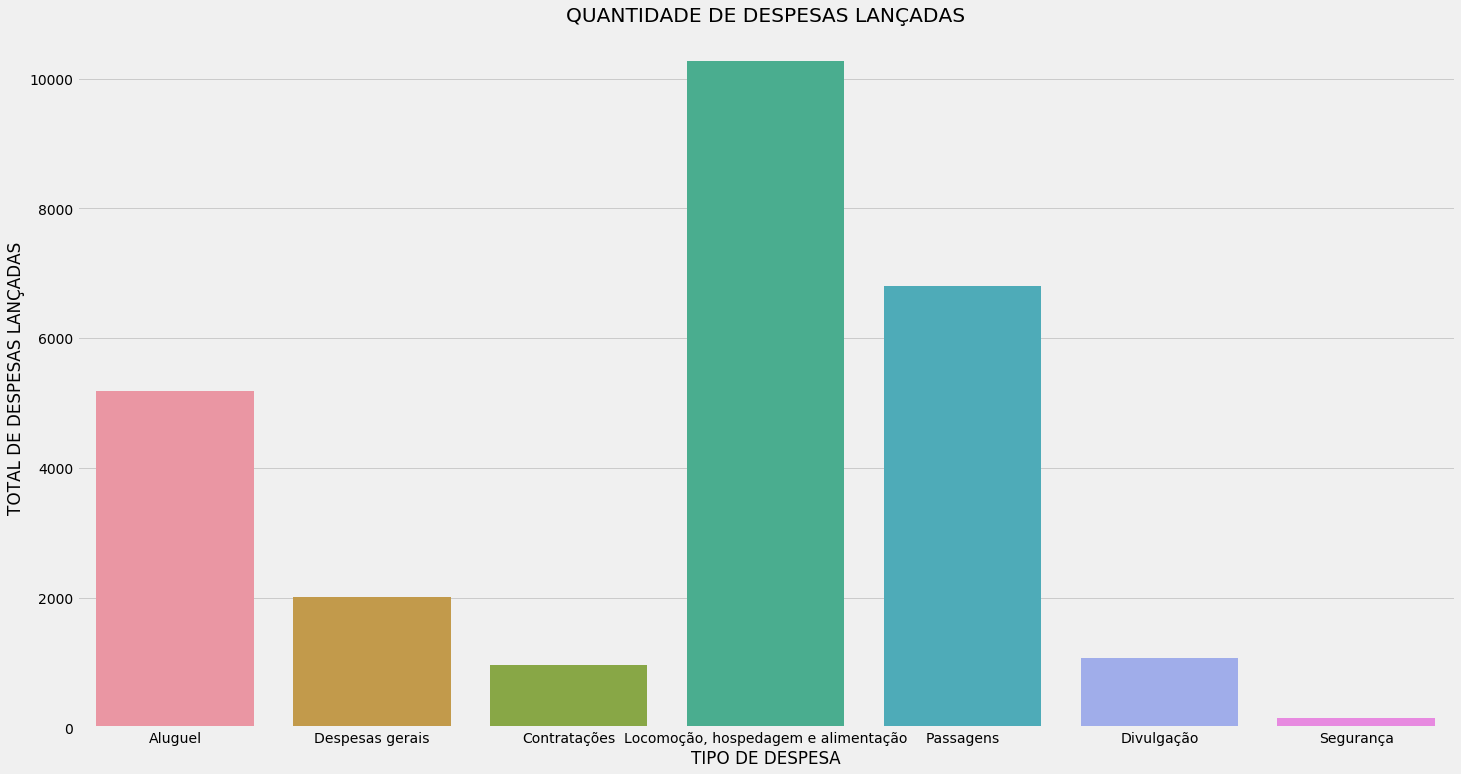

In [13]:
sns.countplot(data=df, x='TIPO_DESPESA')

#Definindo título
plt.title('QUANTIDADE DE DESPESAS LANÇADAS')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('TIPO DE DESPESA')
plt.ylabel('TOTAL DE DESPESAS LANÇADAS')
#Exibindo gráfico
plt.show()

### Verificando a quantidade de despesas lançadas por cada senador.

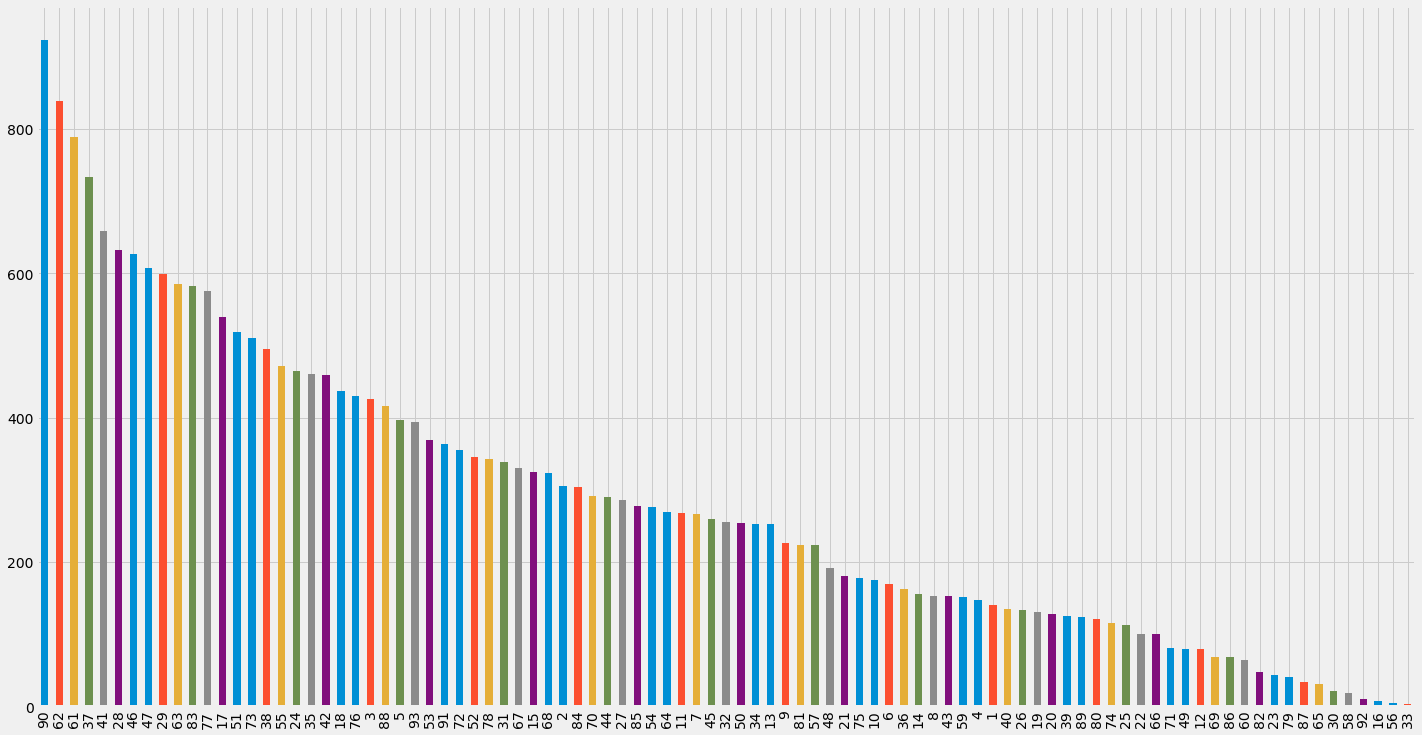

In [14]:
df['SENADOR'].value_counts().plot(kind='bar')
plt.show()

### Verificando os senadores que tiveram mais dinheiro reembolsado, do maior para o menor

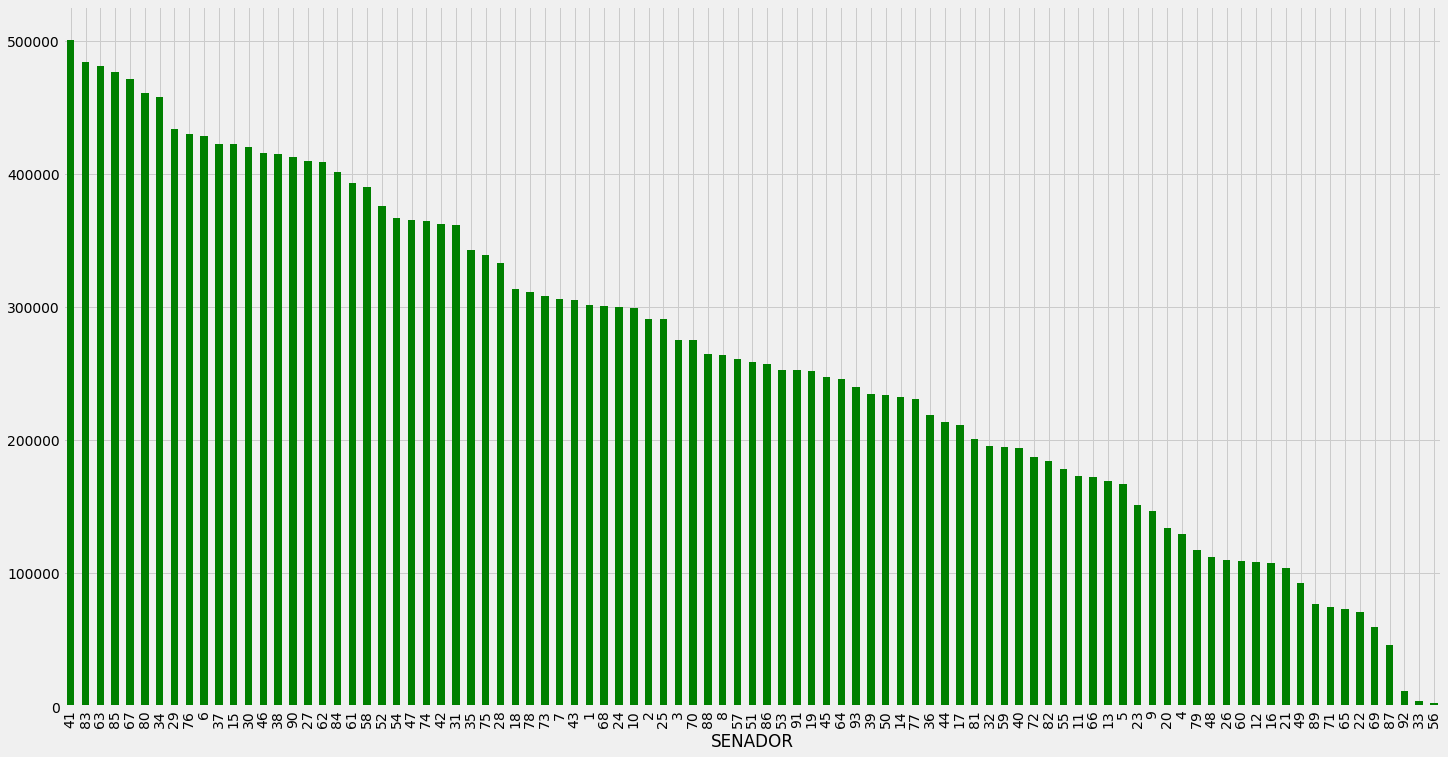

In [15]:
valores_senadores = df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False)
valores_senadores.plot(kind='bar', color='green')
plt.show()

In [16]:
#Transformando todos os valores da coluna Data para apenas retornar o ano e mês
df['DATA'] = df['DATA'].apply(lambda x: x.strftime('%Y-%m'))

### Verificando o quanto que foi pedido de reembolso durante cada mês

In [17]:
gastos_por_mes = df.pivot_table(index='DATA', values='VALOR_REEMBOLSADO', aggfunc=np.sum)

# map to view month's name
gastos_por_mes = gastos_por_mes.rename(index={
                      '2016-01':"janeiro",
                      '2016-02':"fevereiro",
                      '2016-03':"março",
                      '2016-04':"abril",
                      '2016-05':"maio",
                      '2016-06':"junho",
                      '2016-07':"julho",
                      '2016-08':"agosto",
                      '2016-09':"setembro",
                      '2016-10':"outubro",
                      '2016-11':"novembro",
                      '2016-12':"dezembro"})
gastos_por_mes

,VALOR_REEMBOLSADO
DATA,
janeiro,3336700.22
fevereiro,2100231.93
março,2064722.23
abril,1987574.76
maio,2421666.25
junho,2061906.64
julho,1645481.34
agosto,1823074.25
setembro,1672972.12


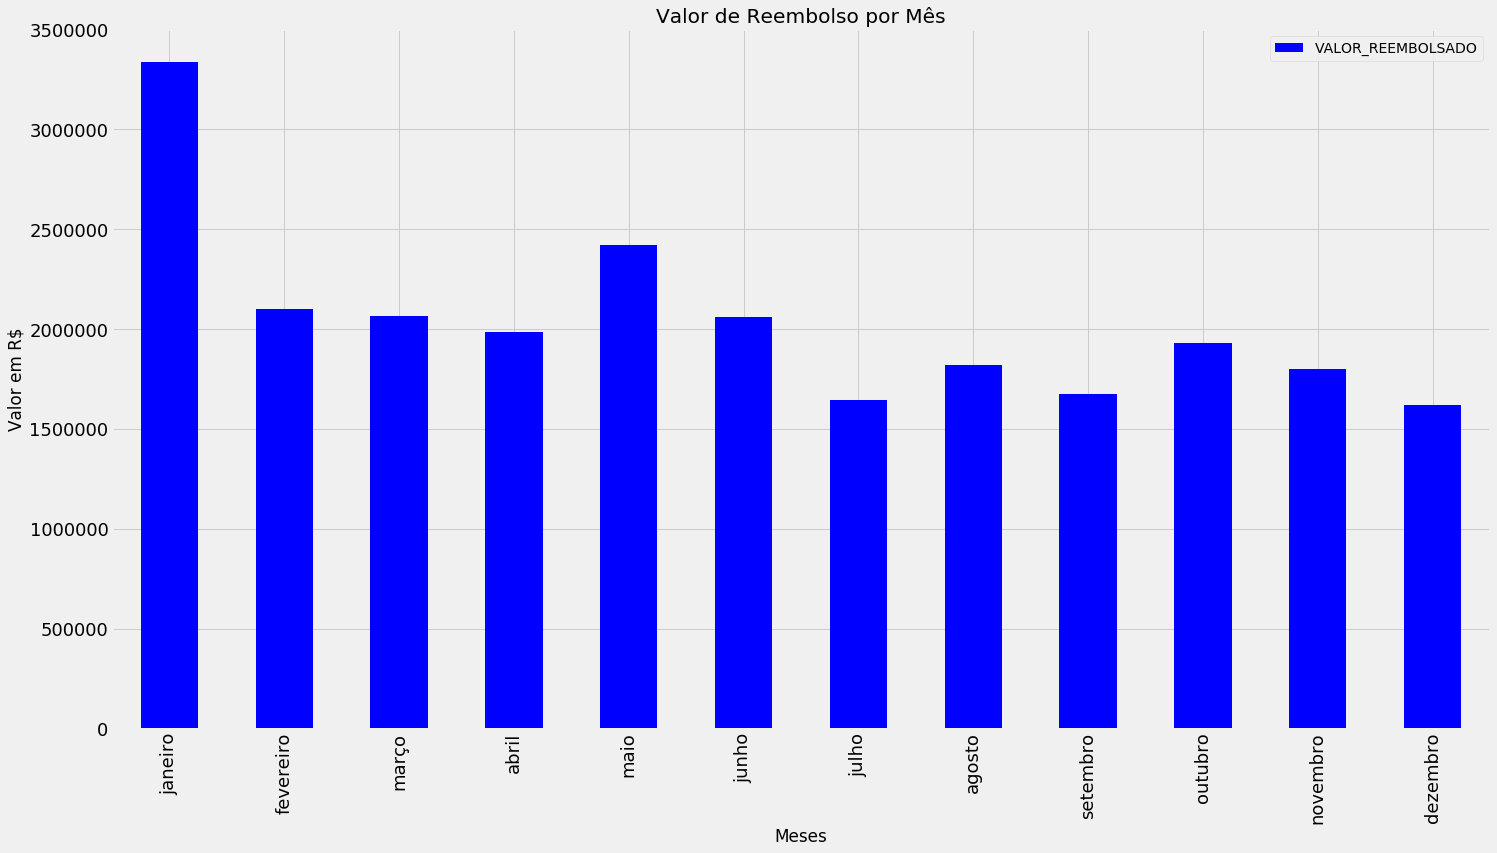

In [18]:
gastos_por_mes.plot(kind='bar', color='blue', fontsize=18)

# visualização do gráfico
plt.ylabel('Valor em R$')
plt.xlabel('Meses')
plt.title("Valor de Reembolso por Mês")
plt.legend(loc="upper right")
plt.legend()
plt.show()

### Verificando a média e mediana dos valores reembolsados

In [19]:
#Selecionando reembolsos feitos apenas em 2016
dados2016 = df[(df['DATA'] >= '2016-01') & (df['DATA'] <= '2016-12')]

#Ultimas linhas do arquivo
dados2016.tail()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
26432,2016,12,93,"Locomoção, hospedagem e alimentação",01.245.727/0001-00,Trevo Posto de Serviços Ltda,083555,2016-12,-1,183.40
26433,2016,12,93,"Locomoção, hospedagem e alimentação",01.245.727/0001-00,Trevo Posto de Serviços Ltda,084787,2016-12,-1,50.00
26434,2016,12,93,Passagens,09.296.295/0001-60,Azul,QGIJ8X,2016-07,"Companhia Aérea: AZUL, Localizador: QGIJ8X. Pa...",1055.41
26435,2016,12,93,Passagens,21.443.582/0001-50,Pronto Produção de Eventos e Turismo Ltda,S6ZB6L,2016-12,"Companhia Aérea: AZUL, Localizador: S6ZB6L. Pa...",390.18
26436,2016,12,93,Passagens,21.443.582/0001-50,Pronto Produção de Eventos e Turismo Ltda,ZDS6KY,2016-12,"Companhia Aérea: GOL, Localizador: ZDS6KY. Pas...",654.28


In [20]:
#Geração dos dados para o mapa de calor
#Criando uma Pivot Table
mapa_de_calor = dados2016.pivot_table(index='DATA', values='VALOR_REEMBOLSADO', columns='TIPO_DESPESA', aggfunc=np.sum)

# map to view month's name
mapa_de_calor = mapa_de_calor.rename(index={
                      '2016-01':"janeiro",
                      '2016-02':"fevereiro",
                      '2016-03':"março",
                      '2016-04':"abril",
                      '2016-05':"maio",
                      '2016-06':"junho",
                      '2016-07':"julho",
                      '2016-08':"agosto",
                      '2016-09':"setembro",
                      '2016-10':"outubro",
                      '2016-11':"novembro",
                      '2016-12':"dezembro"})

mapa_de_calor.head()

TIPO_DESPESA,Aluguel,Contratações,Despesas gerais,Divulgação,"Locomoção, hospedagem e alimentação",Passagens,Segurança
DATA,,,,,,,
janeiro,681720.72,519205.27,130287.53,419496.30,878387.57,423176.74,284426.09
fevereiro,355621.91,286143.29,103718.82,252818.74,592270.58,487826.19,21832.40
março,361367.60,255112.80,94986.41,291705.97,440847.14,586842.49,33859.82
abril,392789.93,243225.69,93684.00,224044.85,462819.68,549032.37,21978.24
maio,764974.79,275629.88,80266.83,263856.45,476910.51,520546.83,39480.96


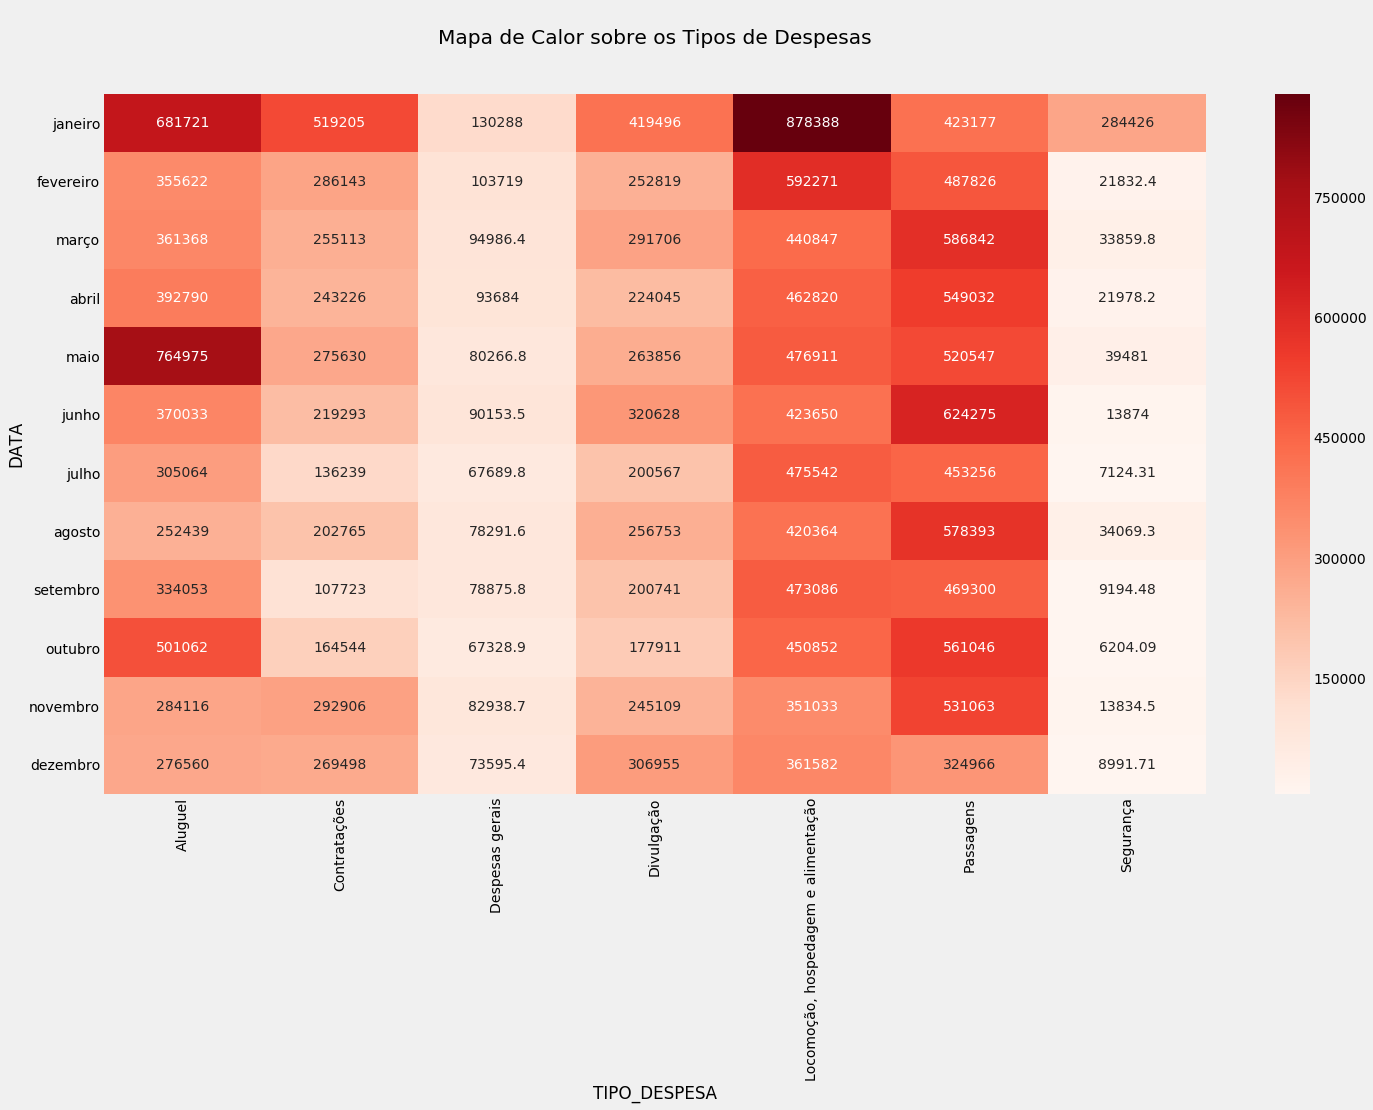

In [21]:
#Gerando o mapa de calor
sns.heatmap(mapa_de_calor, annot=True, fmt='g', cmap='Reds')

plt.title("\nMapa de Calor sobre os Tipos de Despesas\n\n")
plt.show()